## Getting Recent SC Wharf IFCB Data

Data from the auto-class can be accessed remotely from requests.

First, we need to the PID for the most recent bin of data

In [1]:
import requests, json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [2]:
now = "T".join(str(dt.datetime.now()).split(" ")).split('.')[0]
url = "http://128.114.25.154:8888/IFCB104/api/feed/nearest/" + now
response = requests.get(url).json()
pid = response['pid']
print(pid)

http://128.114.25.154:8888/IFCB104/D20210701T201527_IFCB104


In [3]:
autoclass_url = pid+"_class_scores.csv"
df_autoclass = pd.read_csv(autoclass_url) # These are percentage of counts
df_autoclass.head()

,pid,Akashiwo,Alexandrium_singlet,Amy_Gony_Protoc,Asterionellopsis,Centric,Ceratium,Chaetoceros,Cochlodinium,Cryptophyte,...,Peridinium,Lingulodinium,Pennate,Prorocentrum,Pseudo-nitzschia,Scrip_Het,Skeletonema,Thalassionema,Thalassiosira,unclassified
0,D20210701T201527_IFCB104_00001,0.0,0.00,0.08,0.01,0.02,0.00,0.09,0.02,0.00,...,0.0,0.0,0.06,0.0,0.00,0.03,NaN,NaN,NaN,NaN
1,D20210701T201527_IFCB104_00002,0.0,0.00,0.00,0.01,0.00,0.00,0.02,0.00,0.92,...,0.0,0.0,0.00,0.0,0.00,0.02,NaN,NaN,NaN,NaN
2,D20210701T201527_IFCB104_00003,0.0,0.00,0.00,0.00,0.38,0.00,0.00,0.00,0.00,...,0.0,0.0,0.07,0.0,0.00,0.02,NaN,NaN,NaN,NaN
3,D20210701T201527_IFCB104_00004,0.0,0.00,0.00,0.00,0.48,0.00,0.03,0.00,0.00,...,0.0,0.0,0.05,0.0,0.00,0.11,NaN,NaN,NaN,NaN
4,D20210701T201527_IFCB104_00005,0.0,0.01,0.00,0.09,0.00,0.02,0.67,0.00,0.00,...,0.0,0.0,0.00,0.0,0.02,0.01,NaN,NaN,NaN,NaN


In [32]:
totals = df_autoclass.apply(lambda x: x == df_autoclass.max(axis=1)).sum()
totals = totals.reset_index(name='counts')
totals = totals.rename(columns={'index':'class'})
totals = totals.sort_values(['counts']).reset_index(drop=True)
totals = totals.drop(totals[totals['class'].isin(["pid", "Skeletonema",	"Thalassionema", "Thalassiosira", "unclassified"])].index)
totals.head()

,class,counts
3,Pseudo-nitzschia,0
4,Prorocentrum,0
5,Lingulodinium,0
6,Guin_Dact,0
7,Dinophysis,0


Text(0.5, 1.0, 'http://128.114.25.154:8888/IFCB104/D20210629T161913_IFCB104\nTotal Detections: 1719')

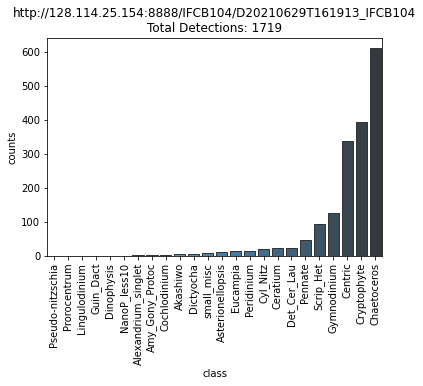

In [37]:
ax = sns.barplot(x="class", y="counts", data=totals,  palette="Blues_d",edgecolor=".2");
plt.xticks(rotation=90, ha='center');
plt.title(pid +"\nTotal Detections: {}".format(df_autoclass.shape[0]))